In [1]:
%%time
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
#import tensorflow.keras.utils.to_categorical
import numpy as np
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense
from tensorflow.keras import optimizers
from tensorflow.keras.layers import BatchNormalization, Dropout
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
%matplotlib inline
import keras
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras import backend as K
from tensorflow.keras.layers import LeakyReLU
from emnist import extract_training_samples
from emnist import extract_test_samples
from tensorflow.keras import utils
from matplotlib import pyplot
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import pickle
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from PIL import Image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import LearningRateScheduler, ModelCheckpoint
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from tensorflow.keras.utils import plot_model, to_categorical
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import pandas as pd
import time
import os
from numpy import mean
from numpy import std
from matplotlib import pyplot
from sklearn.model_selection import KFold
from tensorflow.keras.optimizers import SGD
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

CPU times: user 2.96 s, sys: 3.5 s, total: 6.46 s
Wall time: 2.55 s


Using TensorFlow backend.


In [2]:
#Global para's

img_width, img_height = 28, 28
leaky_relu_alpha = 0.1

In [3]:
X_train, y_train = extract_training_samples('balanced')
X_test, y_test = extract_test_samples('balanced')

num_pixels = X_train.shape[1] * X_train.shape[2]
X_train = X_train.reshape((X_train.shape[0], num_pixels)).astype('float32')
X_test = X_test.reshape((X_test.shape[0], num_pixels)).astype('float32')

X_train = X_train / 255
X_test = X_test / 255

y_train = utils.to_categorical(y_train)
y_test = utils.to_categorical(y_test)
num_classes = y_test.shape[1]


'''
CNN's require a different formal of input data as compared to MLP;
this function reshapes the image data accordingly.

Reshapring for 3D cnn format since we are using black and white images, gotta made it 3dim.

'''

img_width, img_height = 28, 28

X_trainCNN, y_trainCNN = extract_training_samples('balanced')
X_testCNN, y_testCNN = extract_test_samples('balanced')

if K.image_data_format() == 'channels_first':
    X_trainCNN = X_trainCNN.reshape(X_trainCNN.shape[0], 1, img_width, img_height)
    X_testCNN = X_testCNN.reshape(X_testCNN.shape[0], 1, img_width, img_height)
    CNNinput_shape = (1, img_width, img_height)
else:
    X_trainCNN = X_trainCNN.reshape(X_trainCNN.shape[0], img_width, img_height, 1)
    X_testCNN = X_testCNN.reshape(X_testCNN.shape[0], img_width, img_height, 1)
    CNNinput_shape = (img_width, img_height, 1)
    
X_trainCNN = X_trainCNN / 255
X_testCNN = X_testCNN / 255
    
y_trainCNN = utils.to_categorical(y_trainCNN)
y_testCNN = utils.to_categorical(y_testCNN)

In [4]:

def conv_model4():

    '''
    {784 - [32C3-32C3-32C5S2] - [64C3-64C3-64C5S2] - 128 - 47}
    '''
    
    model = Sequential()
    
    model.add(Conv2D(32, kernel_size = 3,input_shape = CNNinput_shape))
    model.add(LeakyReLU(alpha=leaky_relu_alpha))
    model.add(BatchNormalization())
    
    model.add(Conv2D(32, kernel_size = 3))
    model.add(LeakyReLU(alpha=leaky_relu_alpha))    
    model.add(BatchNormalization())

    model.add(Conv2D(32, kernel_size = 5, strides=2, padding='same'))
    model.add(LeakyReLU(alpha=leaky_relu_alpha))    
    model.add(BatchNormalization())
    model.add(Dropout(0.4))

    
    
    model.add(Conv2D(64, kernel_size = 3))
    model.add(LeakyReLU(alpha=leaky_relu_alpha))
    model.add(BatchNormalization())
    
    model.add(Conv2D(64, kernel_size = 3))
    model.add(LeakyReLU(alpha=leaky_relu_alpha))
    model.add(BatchNormalization())
        
    model.add(Conv2D(64, kernel_size = 5, strides=2, padding='same'))
    model.add(LeakyReLU(alpha=leaky_relu_alpha))
    model.add(BatchNormalization())
    model.add(Dropout(0.4))
    
    

    model.add(Conv2D(128, kernel_size = 4))
    model.add(LeakyReLU(alpha=leaky_relu_alpha))
    model.add(BatchNormalization())
    
    model.add(Flatten())
    model.add(Dropout(0.4))
               
    model.add(Dense(num_classes, activation='softmax'))
    
    adam = optimizers.Adam(lr = 0.001)
    model.compile(optimizer = adam, loss = 'categorical_crossentropy', metrics = ['accuracy'])
    
    return model

In [5]:

def conv_model5():

    '''
    {784 - [32C3-32C3-32C5S2] - [64C3-64C3-64C5S2] - 128 - 47}
    '''
    
    model = Sequential()
    
    model.add(Conv2D(32, kernel_size = 3,input_shape = CNNinput_shape))
    model.add(LeakyReLU(alpha=leaky_relu_alpha))
    model.add(BatchNormalization())
    
    model.add(Conv2D(32, kernel_size = 3))
    model.add(LeakyReLU(alpha=leaky_relu_alpha))    
    model.add(BatchNormalization())

    model.add(Conv2D(32, kernel_size = 5, strides=2, padding='same'))
    model.add(LeakyReLU(alpha=leaky_relu_alpha))    
    model.add(BatchNormalization())
    model.add(Dropout(0.5))

    
    
    model.add(Conv2D(64, kernel_size = 3))
    model.add(LeakyReLU(alpha=leaky_relu_alpha))
    model.add(BatchNormalization())
    
    model.add(Conv2D(64, kernel_size = 3))
    model.add(LeakyReLU(alpha=leaky_relu_alpha))
    model.add(BatchNormalization())
        
    model.add(Conv2D(64, kernel_size = 5, strides=2, padding='same'))
    model.add(LeakyReLU(alpha=leaky_relu_alpha))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))
    
    

    model.add(Conv2D(128, kernel_size = 4))
    model.add(LeakyReLU(alpha=leaky_relu_alpha))
    model.add(BatchNormalization())
    
    model.add(Flatten())
    model.add(Dropout(0.5))
               
    model.add(Dense(num_classes, activation='softmax'))
    
    adam = optimizers.Adam(lr = 0.001)
    model.compile(optimizer = adam, loss = 'categorical_crossentropy', metrics = ['accuracy'])
    
    return model

In [6]:

def conv_model3():

    '''
    {784 - [32C3-32C3-32C5S2] - [64C3-64C3-64C5S2] - 128 - 47}
    '''
    
    model = Sequential()
    
    model.add(Conv2D(32, kernel_size = 3,input_shape = CNNinput_shape))
    model.add(LeakyReLU(alpha=leaky_relu_alpha))
    model.add(BatchNormalization())
    
    model.add(Conv2D(32, kernel_size = 3))
    model.add(LeakyReLU(alpha=leaky_relu_alpha))    
    model.add(BatchNormalization())

    model.add(Conv2D(32, kernel_size = 5, strides=2, padding='same'))
    model.add(LeakyReLU(alpha=leaky_relu_alpha))    
    model.add(BatchNormalization())
    model.add(Dropout(0.3))

    
    
    model.add(Conv2D(64, kernel_size = 3))
    model.add(LeakyReLU(alpha=leaky_relu_alpha))
    model.add(BatchNormalization())
    
    model.add(Conv2D(64, kernel_size = 3))
    model.add(LeakyReLU(alpha=leaky_relu_alpha))
    model.add(BatchNormalization())
        
    model.add(Conv2D(64, kernel_size = 5, strides=2, padding='same'))
    model.add(LeakyReLU(alpha=leaky_relu_alpha))
    model.add(BatchNormalization())
    model.add(Dropout(0.3))
    
    

    model.add(Conv2D(128, kernel_size = 4))
    model.add(LeakyReLU(alpha=leaky_relu_alpha))
    model.add(BatchNormalization())
    
    model.add(Flatten())
    model.add(Dropout(0.3))
               
    model.add(Dense(num_classes, activation='softmax'))
    
    adam = optimizers.Adam(lr = 0.001)
    model.compile(optimizer = adam, loss = 'categorical_crossentropy', metrics = ['accuracy'])
    
    return model

In [7]:

def conv_model2():

    '''
    {784 - [32C3-32C3-32C5S2] - [64C3-64C3-64C5S2] - 128 - 47}
    '''
    
    model = Sequential()
    
    model.add(Conv2D(32, kernel_size = 3,input_shape = CNNinput_shape))
    model.add(LeakyReLU(alpha=leaky_relu_alpha))
    model.add(BatchNormalization())
    
    model.add(Conv2D(32, kernel_size = 3))
    model.add(LeakyReLU(alpha=leaky_relu_alpha))    
    model.add(BatchNormalization())

    model.add(Conv2D(32, kernel_size = 5, strides=2, padding='same'))
    model.add(LeakyReLU(alpha=leaky_relu_alpha))    
    model.add(BatchNormalization())
    model.add(Dropout(0.2))

    
    
    model.add(Conv2D(64, kernel_size = 3))
    model.add(LeakyReLU(alpha=leaky_relu_alpha))
    model.add(BatchNormalization())
    
    model.add(Conv2D(64, kernel_size = 3))
    model.add(LeakyReLU(alpha=leaky_relu_alpha))
    model.add(BatchNormalization())
        
    model.add(Conv2D(64, kernel_size = 5, strides=2, padding='same'))
    model.add(LeakyReLU(alpha=leaky_relu_alpha))
    model.add(BatchNormalization())
    model.add(Dropout(0.2))
    
    

    model.add(Conv2D(128, kernel_size = 4))
    model.add(LeakyReLU(alpha=leaky_relu_alpha))
    model.add(BatchNormalization())
    
    model.add(Flatten())
    model.add(Dropout(0.2))
               
    model.add(Dense(num_classes, activation='softmax'))
    
    adam = optimizers.Adam(lr = 0.001)
    model.compile(optimizer = adam, loss = 'categorical_crossentropy', metrics = ['accuracy'])
    
    return model

In [8]:

def conv_model1():

    '''
    {784 - [32C3-32C3-32C5S2] - [64C3-64C3-64C5S2] - 128 - 47}
    '''
    
    model = Sequential()
    
    model.add(Conv2D(32, kernel_size = 3,input_shape = CNNinput_shape))
    model.add(LeakyReLU(alpha=leaky_relu_alpha))
    model.add(BatchNormalization())
    
    model.add(Conv2D(32, kernel_size = 3))
    model.add(LeakyReLU(alpha=leaky_relu_alpha))    
    model.add(BatchNormalization())

    model.add(Conv2D(32, kernel_size = 5, strides=2, padding='same'))
    model.add(LeakyReLU(alpha=leaky_relu_alpha))    
    model.add(BatchNormalization())
    model.add(Dropout(0.1))

    
    
    model.add(Conv2D(64, kernel_size = 3))
    model.add(LeakyReLU(alpha=leaky_relu_alpha))
    model.add(BatchNormalization())
    
    model.add(Conv2D(64, kernel_size = 3))
    model.add(LeakyReLU(alpha=leaky_relu_alpha))
    model.add(BatchNormalization())
        
    model.add(Conv2D(64, kernel_size = 5, strides=2, padding='same'))
    model.add(LeakyReLU(alpha=leaky_relu_alpha))
    model.add(BatchNormalization())
    model.add(Dropout(0.1))
    
    

    model.add(Conv2D(128, kernel_size = 4))
    model.add(LeakyReLU(alpha=leaky_relu_alpha))
    model.add(BatchNormalization())
    
    model.add(Flatten())
    model.add(Dropout(0.1))
               
    model.add(Dense(num_classes, activation='softmax'))
    
    adam = optimizers.Adam(lr = 0.001)
    model.compile(optimizer = adam, loss = 'categorical_crossentropy', metrics = ['accuracy'])
    
    return model

In [9]:

def conv_model():

    '''
    {784 - [32C3-32C3-32C5S2] - [64C3-64C3-64C5S2] - 128 - 47}
    '''
    
    model = Sequential()
    
    model.add(Conv2D(32, kernel_size = 3,input_shape = CNNinput_shape))
    model.add(LeakyReLU(alpha=leaky_relu_alpha))
    model.add(BatchNormalization())
    
    model.add(Conv2D(32, kernel_size = 3))
    model.add(LeakyReLU(alpha=leaky_relu_alpha))    
    model.add(BatchNormalization())

    model.add(Conv2D(32, kernel_size = 5, strides=2, padding='same'))
    model.add(LeakyReLU(alpha=leaky_relu_alpha))    
    model.add(BatchNormalization())
   

    
    
    model.add(Conv2D(64, kernel_size = 3))
    model.add(LeakyReLU(alpha=leaky_relu_alpha))
    model.add(BatchNormalization())
    
    model.add(Conv2D(64, kernel_size = 3))
    model.add(LeakyReLU(alpha=leaky_relu_alpha))
    model.add(BatchNormalization())
        
    model.add(Conv2D(64, kernel_size = 5, strides=2, padding='same'))
    model.add(LeakyReLU(alpha=leaky_relu_alpha))
    model.add(BatchNormalization())
 
    

    model.add(Conv2D(128, kernel_size = 4))
    model.add(LeakyReLU(alpha=leaky_relu_alpha))
    model.add(BatchNormalization())
    
    model.add(Flatten())

               
    model.add(Dense(num_classes, activation='softmax'))
    
    adam = optimizers.Adam(lr = 0.001)
    model.compile(optimizer = adam, loss = 'categorical_crossentropy', metrics = ['accuracy'])
    
    return model

In [10]:
CNN_model = conv_model()
CNN_model1 = conv_model1()
CNN_model2 = conv_model2()
CNN_model3 = conv_model3()
CNN_model4 = conv_model4()
CNN_model5 = conv_model5()

In [11]:
%%time

#0

CNNHistory = CNN_model.fit(X_trainCNN, y_trainCNN, validation_data=(X_testCNN, y_testCNN), epochs=30, batch_size=200, verbose=2)
CNN_scores = CNN_model.evaluate(X_testCNN, y_testCNN, verbose=0)
print("Baseline Error: %.2f%%" % (100-CNN_scores[1]*100))
print(f'Test loss for base CNN: {CNN_scores[0]} / Test accuracy: {CNN_scores[1]}')

Epoch 1/30
564/564 - 62s - loss: 0.5913 - accuracy: 0.8149 - val_loss: 0.4547 - val_accuracy: 0.8480
Epoch 2/30
564/564 - 53s - loss: 0.3412 - accuracy: 0.8776 - val_loss: 0.3602 - val_accuracy: 0.8749
Epoch 3/30
564/564 - 53s - loss: 0.3038 - accuracy: 0.8885 - val_loss: 0.3352 - val_accuracy: 0.8847
Epoch 4/30
564/564 - 53s - loss: 0.2779 - accuracy: 0.8958 - val_loss: 0.3362 - val_accuracy: 0.8844
Epoch 5/30
564/564 - 65s - loss: 0.2604 - accuracy: 0.9007 - val_loss: 0.3383 - val_accuracy: 0.8842
Epoch 6/30
564/564 - 72s - loss: 0.2466 - accuracy: 0.9048 - val_loss: 0.3277 - val_accuracy: 0.8863
Epoch 7/30
564/564 - 74s - loss: 0.2319 - accuracy: 0.9089 - val_loss: 0.3396 - val_accuracy: 0.8822
Epoch 8/30
564/564 - 73s - loss: 0.2177 - accuracy: 0.9134 - val_loss: 0.3547 - val_accuracy: 0.8766
Epoch 9/30
564/564 - 74s - loss: 0.2050 - accuracy: 0.9178 - val_loss: 0.3406 - val_accuracy: 0.8813
Epoch 10/30
564/564 - 73s - loss: 0.1933 - accuracy: 0.9218 - val_loss: 0.3644 - val_accura

In [12]:
%%time

#1

CNNHistory1 = CNN_model1.fit(X_trainCNN, y_trainCNN, validation_data=(X_testCNN, y_testCNN), epochs=30, batch_size=200, verbose=2)
CNN_scores1 = CNN_model1.evaluate(X_testCNN, y_testCNN, verbose=0)
print("Baseline Error: %.2f%%" % (100-CNN_scores1[1]*100))
print(f'Test loss for base CNN: {CNN_scores1[0]} / Test accuracy: {CNN_scores1[1]}')

Epoch 1/30
564/564 - 75s - loss: 0.6497 - accuracy: 0.7992 - val_loss: 0.5442 - val_accuracy: 0.8202
Epoch 2/30
564/564 - 76s - loss: 0.3708 - accuracy: 0.8677 - val_loss: 0.3723 - val_accuracy: 0.8722
Epoch 3/30
564/564 - 75s - loss: 0.3280 - accuracy: 0.8807 - val_loss: 0.3432 - val_accuracy: 0.8803
Epoch 4/30
564/564 - 74s - loss: 0.3045 - accuracy: 0.8877 - val_loss: 0.3259 - val_accuracy: 0.8821
Epoch 5/30
564/564 - 74s - loss: 0.2900 - accuracy: 0.8911 - val_loss: 0.3306 - val_accuracy: 0.8841
Epoch 6/30
564/564 - 75s - loss: 0.2739 - accuracy: 0.8962 - val_loss: 0.3325 - val_accuracy: 0.8868
Epoch 7/30
564/564 - 76s - loss: 0.2652 - accuracy: 0.8994 - val_loss: 0.3122 - val_accuracy: 0.8905
Epoch 8/30
564/564 - 75s - loss: 0.2551 - accuracy: 0.9020 - val_loss: 0.3106 - val_accuracy: 0.8891
Epoch 9/30
564/564 - 74s - loss: 0.2445 - accuracy: 0.9050 - val_loss: 0.3199 - val_accuracy: 0.8915
Epoch 10/30
564/564 - 75s - loss: 0.2349 - accuracy: 0.9087 - val_loss: 0.3181 - val_accura

In [13]:
%%time


CNNHistory2 = CNN_model2.fit(X_trainCNN, y_trainCNN, validation_data=(X_testCNN, y_testCNN), epochs=30, batch_size=200, verbose=2)
CNN_scores2 = CNN_model2.evaluate(X_testCNN, y_testCNN, verbose=0)
print("Baseline Error: %.2f%%" % (100-CNN_scores2[1]*100))
print(f'Test loss for base CNN: {CNN_scores2[0]} / Test accuracy: {CNN_scores2[1]}')

Epoch 1/30
564/564 - 55s - loss: 0.7380 - accuracy: 0.7753 - val_loss: 0.5013 - val_accuracy: 0.8345
Epoch 2/30
564/564 - 54s - loss: 0.4028 - accuracy: 0.8594 - val_loss: 0.3683 - val_accuracy: 0.8726
Epoch 3/30
564/564 - 54s - loss: 0.3548 - accuracy: 0.8734 - val_loss: 0.3371 - val_accuracy: 0.8820
Epoch 4/30
564/564 - 54s - loss: 0.3296 - accuracy: 0.8799 - val_loss: 0.3519 - val_accuracy: 0.8799
Epoch 5/30
564/564 - 55s - loss: 0.3140 - accuracy: 0.8849 - val_loss: 0.3352 - val_accuracy: 0.8838
Epoch 6/30
564/564 - 55s - loss: 0.3020 - accuracy: 0.8877 - val_loss: 0.3313 - val_accuracy: 0.8849
Epoch 7/30
564/564 - 53s - loss: 0.2902 - accuracy: 0.8906 - val_loss: 0.3160 - val_accuracy: 0.8895
Epoch 8/30
564/564 - 54s - loss: 0.2823 - accuracy: 0.8939 - val_loss: 0.3172 - val_accuracy: 0.8906
Epoch 9/30
564/564 - 54s - loss: 0.2732 - accuracy: 0.8968 - val_loss: 0.3161 - val_accuracy: 0.8887
Epoch 10/30
564/564 - 54s - loss: 0.2678 - accuracy: 0.8981 - val_loss: 0.3071 - val_accura

In [14]:
%%time


CNNHistory3 = CNN_model3.fit(X_trainCNN, y_trainCNN, validation_data=(X_testCNN, y_testCNN), epochs=30, batch_size=200, verbose=2)
CNN_scores3 = CNN_model3.evaluate(X_testCNN, y_testCNN, verbose=0)
print("Baseline Error: %.2f%%" % (100-CNN_scores3[1]*100))
print(f'Test loss for base CNN: {CNN_scores3[0]} / Test accuracy: {CNN_scores3[1]}')

Epoch 1/30
564/564 - 54s - loss: 0.8502 - accuracy: 0.7462 - val_loss: 0.5464 - val_accuracy: 0.8237
Epoch 2/30
564/564 - 53s - loss: 0.4411 - accuracy: 0.8481 - val_loss: 0.3985 - val_accuracy: 0.8624
Epoch 3/30
564/564 - 53s - loss: 0.3859 - accuracy: 0.8631 - val_loss: 0.3385 - val_accuracy: 0.8781
Epoch 4/30
564/564 - 53s - loss: 0.3618 - accuracy: 0.8706 - val_loss: 0.3432 - val_accuracy: 0.8795
Epoch 5/30
564/564 - 54s - loss: 0.3421 - accuracy: 0.8759 - val_loss: 0.3274 - val_accuracy: 0.8832
Epoch 6/30
564/564 - 54s - loss: 0.3280 - accuracy: 0.8794 - val_loss: 0.3229 - val_accuracy: 0.8849
Epoch 7/30
564/564 - 54s - loss: 0.3174 - accuracy: 0.8837 - val_loss: 0.3251 - val_accuracy: 0.8864
Epoch 8/30
564/564 - 53s - loss: 0.3094 - accuracy: 0.8859 - val_loss: 0.3251 - val_accuracy: 0.8856
Epoch 9/30
564/564 - 53s - loss: 0.2999 - accuracy: 0.8890 - val_loss: 0.3225 - val_accuracy: 0.8872
Epoch 10/30
564/564 - 54s - loss: 0.2951 - accuracy: 0.8905 - val_loss: 0.3053 - val_accura

In [15]:
%%time


CNNHistory4 = CNN_model4.fit(X_trainCNN, y_trainCNN, validation_data=(X_testCNN, y_testCNN), epochs=30, batch_size=200, verbose=2)
CNN_scores4 = CNN_model4.evaluate(X_testCNN, y_testCNN, verbose=0)
print("Baseline Error: %.2f%%" % (100-CNN_scores4[1]*100))
print(f'Test loss for base CNN: {CNN_scores4[0]} / Test accuracy: {CNN_scores4[1]}')

Epoch 1/30
564/564 - 54s - loss: 1.0094 - accuracy: 0.7044 - val_loss: 0.7548 - val_accuracy: 0.7616
Epoch 2/30
564/564 - 53s - loss: 0.4928 - accuracy: 0.8333 - val_loss: 0.3898 - val_accuracy: 0.8647
Epoch 3/30
564/564 - 53s - loss: 0.4272 - accuracy: 0.8507 - val_loss: 0.3606 - val_accuracy: 0.8776
Epoch 4/30
564/564 - 53s - loss: 0.3950 - accuracy: 0.8614 - val_loss: 0.3546 - val_accuracy: 0.8759
Epoch 5/30
564/564 - 53s - loss: 0.3751 - accuracy: 0.8672 - val_loss: 0.3551 - val_accuracy: 0.8772
Epoch 6/30
564/564 - 53s - loss: 0.3575 - accuracy: 0.8719 - val_loss: 0.3412 - val_accuracy: 0.8813
Epoch 7/30
564/564 - 53s - loss: 0.3479 - accuracy: 0.8758 - val_loss: 0.3221 - val_accuracy: 0.8861
Epoch 8/30
564/564 - 53s - loss: 0.3392 - accuracy: 0.8780 - val_loss: 0.3132 - val_accuracy: 0.8886
Epoch 9/30
564/564 - 53s - loss: 0.3307 - accuracy: 0.8799 - val_loss: 0.3108 - val_accuracy: 0.8911
Epoch 10/30
564/564 - 53s - loss: 0.3261 - accuracy: 0.8810 - val_loss: 0.3077 - val_accura

In [16]:
%%time


CNNHistory5 = CNN_model5.fit(X_trainCNN, y_trainCNN, validation_data=(X_testCNN, y_testCNN), epochs=30, batch_size=200, verbose=2)
CNN_scores5 = CNN_model5.evaluate(X_testCNN, y_testCNN, verbose=0)
print("Baseline Error: %.2f%%" % (100-CNN_scores5[1]*100))
print(f'Test loss for base CNN: {CNN_scores5[0]} / Test accuracy: {CNN_scores5[1]}')

Epoch 1/30
564/564 - 53s - loss: 1.2315 - accuracy: 0.6481 - val_loss: 0.6513 - val_accuracy: 0.7820
Epoch 2/30
564/564 - 54s - loss: 0.5704 - accuracy: 0.8107 - val_loss: 0.4159 - val_accuracy: 0.8590
Epoch 3/30
564/564 - 53s - loss: 0.4830 - accuracy: 0.8352 - val_loss: 0.3723 - val_accuracy: 0.8704
Epoch 4/30
564/564 - 53s - loss: 0.4419 - accuracy: 0.8474 - val_loss: 0.3738 - val_accuracy: 0.8720
Epoch 5/30
564/564 - 53s - loss: 0.4204 - accuracy: 0.8556 - val_loss: 0.3628 - val_accuracy: 0.8747
Epoch 6/30
564/564 - 54s - loss: 0.4032 - accuracy: 0.8591 - val_loss: 0.3462 - val_accuracy: 0.8783
Epoch 7/30
564/564 - 53s - loss: 0.3864 - accuracy: 0.8646 - val_loss: 0.3634 - val_accuracy: 0.8688
Epoch 8/30
564/564 - 53s - loss: 0.3772 - accuracy: 0.8661 - val_loss: 0.3311 - val_accuracy: 0.8810
Epoch 9/30
564/564 - 52s - loss: 0.3692 - accuracy: 0.8695 - val_loss: 0.3346 - val_accuracy: 0.8827
Epoch 10/30
564/564 - 53s - loss: 0.3607 - accuracy: 0.8727 - val_loss: 0.3231 - val_accura

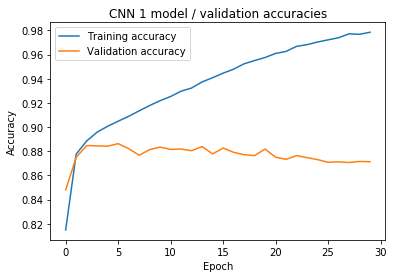

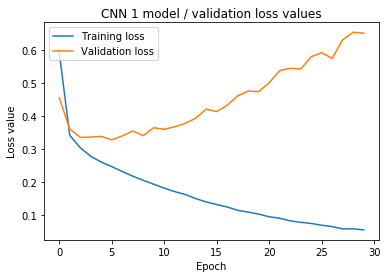

In [17]:
plt.plot(CNNHistory.history['accuracy'], label='Training accuracy')
plt.plot(CNNHistory.history['val_accuracy'], label='Validation accuracy')
plt.title('CNN 1 model / validation accuracies')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc="upper left")
plt.show()

plt.plot(CNNHistory.history['loss'], label='Training loss')
plt.plot(CNNHistory.history['val_loss'], label='Validation loss')
plt.title('CNN 1 model / validation loss values')
plt.ylabel('Loss value')
plt.xlabel('Epoch')
plt.legend(loc="upper left")
plt.show()

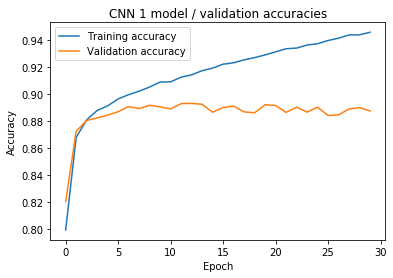

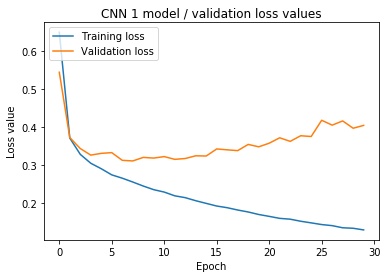

In [18]:
plt.plot(CNNHistory1.history['accuracy'], label='Training accuracy')
plt.plot(CNNHistory1.history['val_accuracy'], label='Validation accuracy')
plt.title('CNN 1 model / validation accuracies')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc="upper left")
plt.show()

plt.plot(CNNHistory1.history['loss'], label='Training loss')
plt.plot(CNNHistory1.history['val_loss'], label='Validation loss')
plt.title('CNN 1 model / validation loss values')
plt.ylabel('Loss value')
plt.xlabel('Epoch')
plt.legend(loc="upper left")
plt.show()

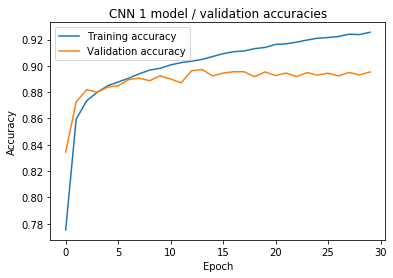

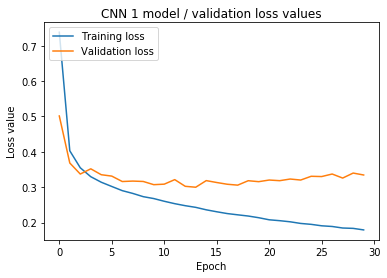

In [19]:
plt.plot(CNNHistory2.history['accuracy'], label='Training accuracy')
plt.plot(CNNHistory2.history['val_accuracy'], label='Validation accuracy')
plt.title('CNN 1 model / validation accuracies')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc="upper left")
plt.show()

plt.plot(CNNHistory2.history['loss'], label='Training loss')
plt.plot(CNNHistory2.history['val_loss'], label='Validation loss')
plt.title('CNN 1 model / validation loss values')
plt.ylabel('Loss value')
plt.xlabel('Epoch')
plt.legend(loc="upper left")
plt.show()

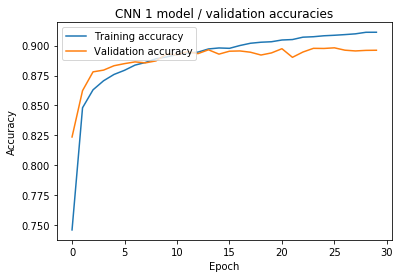

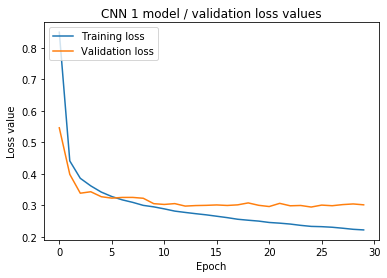

In [20]:
plt.plot(CNNHistory3.history['accuracy'], label='Training accuracy')
plt.plot(CNNHistory3.history['val_accuracy'], label='Validation accuracy')
plt.title('CNN 1 model / validation accuracies')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc="upper left")
plt.show()

plt.plot(CNNHistory3.history['loss'], label='Training loss')
plt.plot(CNNHistory3.history['val_loss'], label='Validation loss')
plt.title('CNN 1 model / validation loss values')
plt.ylabel('Loss value')
plt.xlabel('Epoch')
plt.legend(loc="upper left")
plt.show()

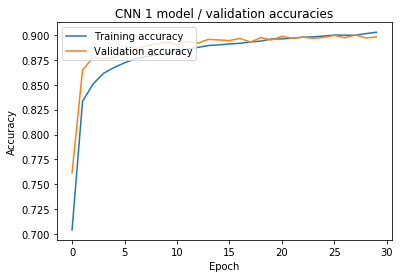

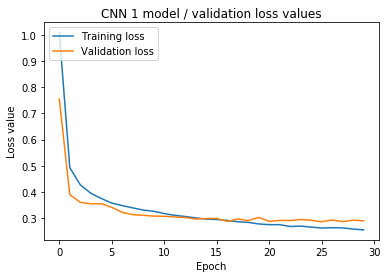

In [21]:
plt.plot(CNNHistory4.history['accuracy'], label='Training accuracy')
plt.plot(CNNHistory4.history['val_accuracy'], label='Validation accuracy')
plt.title('CNN 1 model / validation accuracies')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc="upper left")
plt.show()

plt.plot(CNNHistory4.history['loss'], label='Training loss')
plt.plot(CNNHistory4.history['val_loss'], label='Validation loss')
plt.title('CNN 1 model / validation loss values')
plt.ylabel('Loss value')
plt.xlabel('Epoch')
plt.legend(loc="upper left")
plt.show()

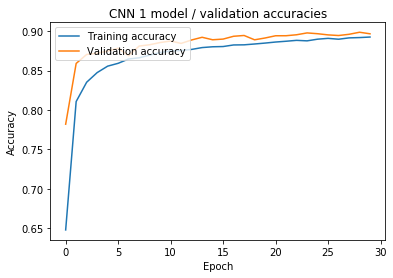

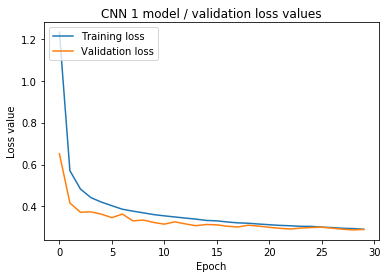

In [22]:
plt.plot(CNNHistory5.history['accuracy'], label='Training accuracy')
plt.plot(CNNHistory5.history['val_accuracy'], label='Validation accuracy')
plt.title('CNN 1 model / validation accuracies')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc="upper left")
plt.show()

plt.plot(CNNHistory5.history['loss'], label='Training loss')
plt.plot(CNNHistory5.history['val_loss'], label='Validation loss')
plt.title('CNN 1 model / validation loss values')
plt.ylabel('Loss value')
plt.xlabel('Epoch')
plt.legend(loc="upper left")
plt.show()

In [23]:
%%time


CNNHistory5 = CNN_model5.fit(X_trainCNN, y_trainCNN, validation_data=(X_testCNN, y_testCNN), epochs=50, batch_size=150, verbose=2)
CNN_scores5 = CNN_model5.evaluate(X_testCNN, y_testCNN, verbose=0)
print("Baseline Error: %.2f%%" % (100-CNN_scores5[1]*100))
print(f'Test loss for base CNN: {CNN_scores5[0]} / Test accuracy: {CNN_scores5[1]}')

Epoch 1/50
752/752 - 59s - loss: 0.3006 - accuracy: 0.8894 - val_loss: 0.2990 - val_accuracy: 0.8939
Epoch 2/50
752/752 - 59s - loss: 0.2969 - accuracy: 0.8909 - val_loss: 0.2930 - val_accuracy: 0.8954
Epoch 3/50
752/752 - 57s - loss: 0.2938 - accuracy: 0.8921 - val_loss: 0.2943 - val_accuracy: 0.8975
Epoch 4/50
752/752 - 58s - loss: 0.2922 - accuracy: 0.8920 - val_loss: 0.3011 - val_accuracy: 0.8947
Epoch 5/50
752/752 - 58s - loss: 0.2887 - accuracy: 0.8939 - val_loss: 0.2880 - val_accuracy: 0.8972
Epoch 6/50
752/752 - 58s - loss: 0.2887 - accuracy: 0.8935 - val_loss: 0.2965 - val_accuracy: 0.8962
Epoch 7/50
752/752 - 57s - loss: 0.2871 - accuracy: 0.8939 - val_loss: 0.2918 - val_accuracy: 0.8981
Epoch 8/50
752/752 - 58s - loss: 0.2858 - accuracy: 0.8944 - val_loss: 0.2921 - val_accuracy: 0.8965
Epoch 9/50
752/752 - 58s - loss: 0.2853 - accuracy: 0.8935 - val_loss: 0.2942 - val_accuracy: 0.8975
Epoch 10/50
752/752 - 58s - loss: 0.2842 - accuracy: 0.8951 - val_loss: 0.2935 - val_accura

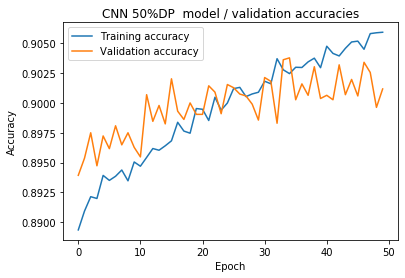

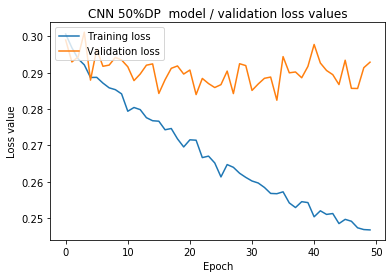

In [24]:
plt.plot(CNNHistory5.history['accuracy'], label='Training accuracy')
plt.plot(CNNHistory5.history['val_accuracy'], label='Validation accuracy')
plt.title('CNN 50%DP  model / validation accuracies')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc="upper left")
plt.show()

plt.plot(CNNHistory5.history['loss'], label='Training loss')
plt.plot(CNNHistory5.history['val_loss'], label='Validation loss')
plt.title('CNN 50%DP  model / validation loss values')
plt.ylabel('Loss value')
plt.xlabel('Epoch')
plt.legend(loc="upper left")
plt.show()

## Batchsize

In [25]:
from sklearn.model_selection import RandomizedSearchCV
from keras.wrappers.scikit_learn import KerasClassifier

In [26]:
def conv_modelOPT():

    '''
    {784 - [32C3-32C3-32C5S2] - [64C3-64C3-64C5S2] - 128 - 47}
    '''
    
    model = Sequential()
    
    model.add(Conv2D(32, kernel_size = 3, input_shape = CNNinput_shape))
    model.add(LeakyReLU(alpha=leaky_relu_alpha))
    model.add(BatchNormalization())
    
    model.add(Conv2D(32, kernel_size = 3))
    model.add(LeakyReLU(alpha=leaky_relu_alpha))    
    model.add(BatchNormalization())

    model.add(Conv2D(32, kernel_size = 5, strides=2, padding='same'))
    model.add(LeakyReLU(alpha=leaky_relu_alpha))    
    model.add(BatchNormalization())
    model.add(Dropout(0.4))

    
    
    model.add(Conv2D(64, kernel_size = 3))
    model.add(LeakyReLU(alpha=leaky_relu_alpha))
    model.add(BatchNormalization())
    
    model.add(Conv2D(64, kernel_size = 3))
    model.add(LeakyReLU(alpha=leaky_relu_alpha))
    model.add(BatchNormalization())
        
    model.add(Conv2D(64, kernel_size = 5, strides=2, padding='same'))
    model.add(LeakyReLU(alpha=leaky_relu_alpha))
    model.add(BatchNormalization())
    model.add(Dropout(0.4))
    
    

    model.add(Conv2D(128, kernel_size = 4))
    model.add(LeakyReLU(alpha=leaky_relu_alpha))
    model.add(BatchNormalization())
    
    model.add(Flatten())
    model.add(Dropout(0.4))
               
    model.add(Dense(num_classes, activation='softmax'))
    
    adam = optimizers.Adam(lr =  0.001)
    model.compile(optimizer = adam, loss = 'categorical_crossentropy', metrics = ['accuracy'])
    
    return model

In [27]:
optmodel = KerasClassifier(build_fn= conv_modelOPT, verbose = 1)
batch_size = [25,50,100,150,200,250]
param_dist = dict(batch_size=batch_size)
random_search = RandomizedSearchCV(estimator=optmodel, param_distributions=param_dist, verbose = 2, cv = 3)


In [28]:
%%time
RS_S = random_search.fit(X_trainCNN, y_trainCNN,verbose = 2, batch_size = 150, epochs=20)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:281: UserWarning: The total space of parameters 6 is smaller than n_iter=10. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 3 folds for each of 6 candidates, totalling 18 fits
[CV] batch_size=25 ...................................................
Epoch 1/20
502/502 - 48s - loss: 1.1746 - accuracy: 0.6650
Epoch 2/20
502/502 - 48s - loss: 0.5403 - accuracy: 0.8183
Epoch 3/20
502/502 - 49s - loss: 0.4603 - accuracy: 0.8404
Epoch 4/20
502/502 - 49s - loss: 0.4223 - accuracy: 0.8524
Epoch 5/20
502/502 - 48s - loss: 0.3968 - accuracy: 0.8597
Epoch 6/20
502/502 - 49s - loss: 0.3786 - accuracy: 0.8645
Epoch 7/20
502/502 - 48s - loss: 0.3662 - accuracy: 0.8677
Epoch 8/20
502/502 - 48s - loss: 0.3562 - accuracy: 0.8709
Epoch 9/20
502/502 - 48s - loss: 0.3465 - accuracy: 0.8741
Epoch 10/20
502/502 - 48s - loss: 0.3397 - accuracy: 0.8761
Epoch 11/20
502/502 - 49s - loss: 0.3346 - accuracy: 0.8773
Epoch 12/20
502/502 - 49s - loss: 0.3266 - accuracy: 0.8800
Epoch 13/20
502/502 - 52s - loss: 0.3220 - accuracy: 0.8801
Epoch 14/20
502/502 - 69s - loss: 0.3128 - accuracy: 0.8834
Epoch 15/20
502/502 - 52s - loss: 0.31

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed: 17.9min remaining:    0.0s


Epoch 1/20
502/502 - 48s - loss: 1.1951 - accuracy: 0.6579
Epoch 2/20
502/502 - 49s - loss: 0.5476 - accuracy: 0.8176
Epoch 3/20
502/502 - 48s - loss: 0.4636 - accuracy: 0.8419
Epoch 4/20
502/502 - 45s - loss: 0.4258 - accuracy: 0.8509
Epoch 5/20
502/502 - 38s - loss: 0.4020 - accuracy: 0.8573
Epoch 6/20
502/502 - 47s - loss: 0.3816 - accuracy: 0.8640
Epoch 7/20
502/502 - 61s - loss: 0.3692 - accuracy: 0.8669
Epoch 8/20
502/502 - 60s - loss: 0.3564 - accuracy: 0.8716
Epoch 9/20
502/502 - 50s - loss: 0.3487 - accuracy: 0.8740
Epoch 10/20
502/502 - 38s - loss: 0.3366 - accuracy: 0.8771
Epoch 11/20
502/502 - 56s - loss: 0.3337 - accuracy: 0.8780
Epoch 12/20
502/502 - 60s - loss: 0.3284 - accuracy: 0.8789
Epoch 13/20
502/502 - 60s - loss: 0.3198 - accuracy: 0.8832
Epoch 14/20
502/502 - 61s - loss: 0.3121 - accuracy: 0.8850
Epoch 15/20
502/502 - 61s - loss: 0.3076 - accuracy: 0.8864
Epoch 16/20
502/502 - 48s - loss: 0.3018 - accuracy: 0.8876
Epoch 17/20
502/502 - 38s - loss: 0.2995 - accura

[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed: 226.1min finished


Epoch 1/20
752/752 - 47s - loss: 0.9454 - accuracy: 0.7162
Epoch 2/20
752/752 - 47s - loss: 0.4830 - accuracy: 0.8356
Epoch 3/20
752/752 - 47s - loss: 0.4266 - accuracy: 0.8516
Epoch 4/20
752/752 - 47s - loss: 0.3952 - accuracy: 0.8607
Epoch 5/20
752/752 - 47s - loss: 0.3754 - accuracy: 0.8666
Epoch 6/20
752/752 - 47s - loss: 0.3597 - accuracy: 0.8711
Epoch 7/20
752/752 - 47s - loss: 0.3496 - accuracy: 0.8747
Epoch 8/20
752/752 - 47s - loss: 0.3392 - accuracy: 0.8763
Epoch 9/20
752/752 - 47s - loss: 0.3339 - accuracy: 0.8788
Epoch 10/20
752/752 - 47s - loss: 0.3242 - accuracy: 0.8816
Epoch 11/20
752/752 - 47s - loss: 0.3179 - accuracy: 0.8837
Epoch 12/20
752/752 - 47s - loss: 0.3143 - accuracy: 0.8850
Epoch 13/20
752/752 - 47s - loss: 0.3061 - accuracy: 0.8876
Epoch 14/20
752/752 - 47s - loss: 0.3035 - accuracy: 0.8880
Epoch 15/20
752/752 - 47s - loss: 0.3001 - accuracy: 0.8892
Epoch 16/20
752/752 - 47s - loss: 0.2953 - accuracy: 0.8908
Epoch 17/20
752/752 - 47s - loss: 0.2926 - accura

In [29]:
print("Best: %f using %s" % (RS_S.best_score_, RS_S.best_params_))
means = RS_S.cv_results_['mean_test_score']
stds = RS_S.cv_results_['std_test_score']
params = RS_S.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.894379 using {'batch_size': 50}
0.892243 (0.001953) with: {'batch_size': 25}
0.894379 (0.000865) with: {'batch_size': 50}
0.894025 (0.001184) with: {'batch_size': 100}
0.893794 (0.002082) with: {'batch_size': 150}
0.892713 (0.002904) with: {'batch_size': 200}
0.892385 (0.001652) with: {'batch_size': 250}
